# Desafio 1

Para esse desafio, vamos trabalhar com o data set [Black Friday](https://www.kaggle.com/mehdidag/black-friday), que reúne dados sobre transações de compras em uma loja de varejo.

Vamos utilizá-lo para praticar a exploração de data sets utilizando pandas. Você pode fazer toda análise neste mesmo notebook, mas as resposta devem estar nos locais indicados.

> Obs.: Por favor, não modifique o nome das funções de resposta.

### Importações

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
black_friday = pd.read_csv("black_friday.csv")

### Informações básicas

In [16]:
black_friday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [17]:
black_friday.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [40]:
black_friday.shape

(537577, 12)

In [45]:
black_friday.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

### Análise de exploratória  

* **Qual o gênero e estado civil dos maiores consumidores?**

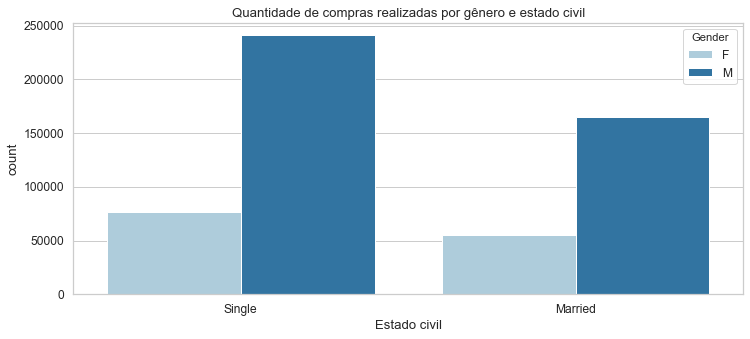

In [30]:
marital_gender = black_friday[['Gender', 'Marital_Status']]
marital_gender['Marital_Status'].replace(to_replace = [0, 1], value = ['Single', 'Married'], inplace=True)
sns.set(style='whitegrid', palette = 'Paired', font_scale=1.1, rc={"figure.figsize": [12, 5]})
sns.countplot(x='Marital_Status', hue='Gender', data=marital_gender);
plt.xlabel('Estado civil')
plt.title('Quantidade de compras realizadas por gênero e estado civil');

Através da análise podemos observar que homens solteiros são os maiores consumidores na Black Friday.

* **Qual faixa etária consome mais na Black Friday?**

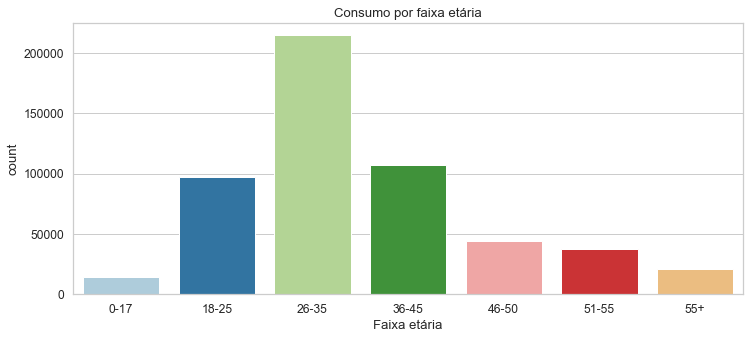

In [21]:
age_order = sorted(black_friday['Age'].unique())
sns.countplot(x='Age', order=age_order, data=black_friday);
plt.xlabel('Faixa etária')
plt.title('Consumo por faixa etária');

Os maiores consumidores pertencem a faixa etária de 26-35 anos. Mas são eles que realizam as compras de maior valor?

* **Qual faixa etária realiza compras de maior valor na Black Friday?**

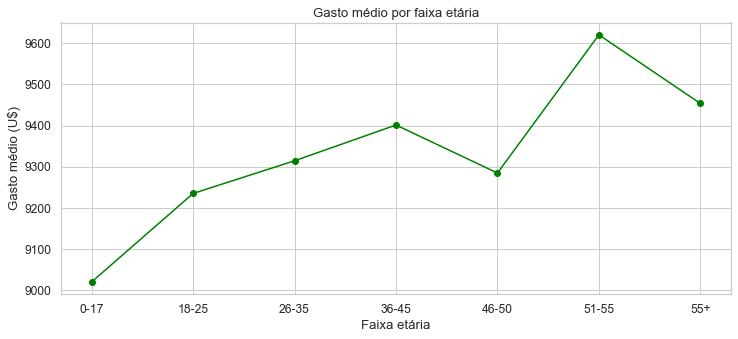

In [31]:
age_purchase = black_friday.groupby('Age')['Purchase'].mean()
age_purchase = pd.DataFrame({'Age':age_purchase.index, 'Average_purchase':age_purchase.values})
plt.plot('Age', 'Average_purchase', 'go-', data=age_purchase, );
plt.xlabel('Faixa etária')
plt.ylabel('Gasto médio (U$)')
plt.title('Gasto médio por faixa etária');

As compras de maior valor são realizadas pelos consumidores que possuem entre 51 e 55 anos.

* **Qual a relação entre o consumo e tempo de conviência?**

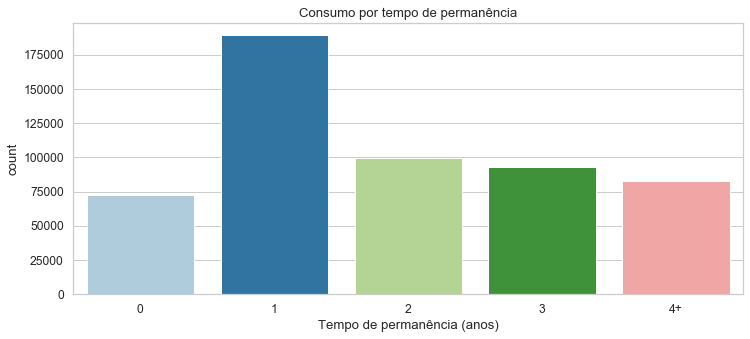

In [42]:
current_order = sorted(black_friday['Stay_In_Current_City_Years'].unique())
sns.countplot(x='Stay_In_Current_City_Years', order=current_order, data=black_friday);
plt.xlabel('Tempo de permanência (anos)')
plt.title('Consumo por tempo de permanência');

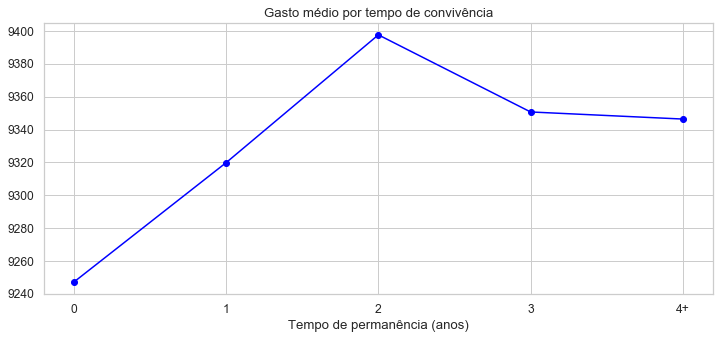

In [43]:
stay_purchase = black_friday.groupby('Stay_In_Current_City_Years')['Purchase'].mean()
stay_purchase = pd.DataFrame({'Stay_In_Current_City_Years':stay_purchase.index, 'Average_purchase':stay_purchase.values})
plt.plot('Stay_In_Current_City_Years', 'Average_purchase', 'bo-', data=stay_purchase);
plt.xlabel('Tempo de permanência (anos)')
plt.title('Gasto médio por tempo de convivência');

Os maiores consumidores são pessoas com tempo de permanência de 1 ano, porém compras de maior valor são realizadas por moradores que possuem a partir de 2 anos de permanência.

### Questão 1

* **Quantas observações e quantas colunas há no dataset? Responda no formato de uma tuple `(n_observacoes, n_colunas)`.**

Para obtermos as dimensões de nosso dataframe podemos utilizar o atributo ***shape***, como demonstrado abaixo. O atributo ***shape*** nos retorna uma tupla contendo **(nº de observações, nº colunas)**.

In [49]:
def q1():
    return black_friday.shape

In [50]:
q1()

(537577, 12)

### Questão 2

* **Há quantas mulheres com idade entre 26 e 35 anos no dataset? Responda como um único escalar.**

O método ***query*** nos permite realizar consultas em nosso dataframe utilizando expressões booleanas. Neste caso, irei realizar uma consulta por mulheres *(Gender == F)* com idade entre 26 e 35 anos *(Age == '26-35')*. Como retorno, teremos um dataframe que satisfaça a condição anterior, porém precisamos obter o nº de observações deste dataframe. Para isso basta utilizarmos o atributo ***shape***, acessando sua primeira posição.

In [52]:
def q2():
    return black_friday.query("Gender == 'F' & Age == '26-35'").shape[0]

In [53]:
q2()

49348

### Questão 3

* **Quantos usuários únicos há no dataset? Responda como um único escalar.**

O método [unique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) retorna os elementos únicos de uma Series ou DataFrame. Os elementos são retornados por ordem de aparência, portanto não são ordenados. Como retorno, iremos obter um *array* contendo os usuários únicos, por fim, basta retornamos o tamanho do array através de *len()*.

In [55]:
def q3():
    return len(black_friday['User_ID'].unique())

In [56]:
q3()

5891

### Questão 4

* **Quantos tipos de dados diferentes existem no dataset? Responda como um único escalar.**

O atributo [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) retorna uma Series contendo os tipos dos dados existente em nosso dataframe. Como estamos interessados apenas na quantidade de tipos únicos, utilizamos o método *unique* em conjunto com o *len*.

In [7]:
def q4():
    return len(black_friday.dtypes.unique())

### Questão 5

* **Qual porcentagem dos registros possui ao menos um valor null (`None`, `ǸaN` etc)? Responda como um único escalar entre 0 e 1.**

Para obter a porcentagem dos registros possuírem ao menos um valor nulo, iremos utilizar o conceito de [probabilidade](https://geekiegames.geekie.com.br/blog/probabilidade-condicional). A probabilidade de um evento ocorrer é dada por:  
$$
Probabilidade = \frac{casos}{observações}
$$

Nossos casos favoráveis são a quantidade de registros que possuem ao menos um valor nulo, ou seja, a quantidade máxima de ocorrência de registros nulos em uma coluna. E para obtermos o número total de observações, basta acessarmos a primeira posição da tupla retornada por *shape*. Realizando a divisão de casos favoráveis pelo número total de observações, iremos obter um valor entre 0 e 1 *(0 ≤ p ≤1)* indicando a porcentagem dos registros possuírem ao menos um valor nulo. 
    

In [57]:
def q5():
    return black_friday.isnull().sum().max() / black_friday.shape[0]

O método [isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) retorna um array de booleanos, com True para valores nulos. A soma de valores nulos por atributo pode ser obtida através de [sum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html) e o valor máximo de registros nulos contidos em um coluna através de [max](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.max.html).

In [59]:
print(f'{q5():.2f}')

0.69


### Questão 6

* **Quantos valores null existem na variável (coluna) com o maior número de null? Responda como um único escalar.**

Como precisamos obter a quantidade máxima de valores nulos em uma coluna para calcular a probabilidade na questão anterior, o exercício 6 está resolvido. Mas ao invés de utilizar o método *isnull*, irei utilizar [isna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html) para demonstrar que ambos possuem a mesma função, detectar valores nulos. Por fim, basta obtermos a soma de registros nulos por coluna com *sum* e a coluna com quantidade máxima utilizando *max*.

In [61]:
def q6():
    return black_friday.isna().sum().max()

In [62]:
q6()

373299

### Questão 7

* **Qual o valor mais frequente (sem contar nulls) em `Product_Category_3`? Responda como um único escalar.**

O valor mais frequente em um conjunto de dados é uma medida estatística de tendência central, conhecida como ***moda***. Podemos obter a moda de **Product_Category_3** através do método [mode](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html). O método mode irá nos retornar uma Series contendo índice e a moda para categoria. A moda em um único escalar pode ser obtidada através do atributo ***values[0]***.

In [10]:
def q7():
    return black_friday['Product_Category_3'].mode().values[0]

In [34]:
type(black_friday['Product_Category_3'].mode())

pandas.core.series.Series

### Questão 8

* **Qual a nova média da variável (coluna) `Purchase` após sua normalização? Responda como um único escalar.**

Antes de obtermos a média da coluna *Purchase*, precisamos normalizá-la. Mas o que é normalização e qual sua função?

A grande maioria dos algoritmos de *Machine Learning* não funcionam tão bem quando atributos numéricos possuem **escalas muito diferentes**, como é o caso de *Product_Category_1 (valores entre 1 e 18)* e *Purchase (valores entre 185 e 23961)*. 

In [40]:
black_friday['Product_Category_1'].min(), black_friday['Product_Category_1'].max()

(1, 18)

In [41]:
black_friday['Purchase'].min(), black_friday['Purchase'].max()

(185, 23961)

Dessa forma, os algoritmos podem atribuir maior peso para atributos com escalas maiores, o que pode não representar a realidade do problema. Iremos abordar duas formas de todos os atributos obterem a mesma escala: ***min-max e padronização***.  

Nesta questão será utilizado o escalonamento ***min_max***, também conhecido como **normalização**. Sua função é redimensionar os valores para o intervalo entre 0 a 1, dessa forma todos os atributos irão possuír a mesma escala. Isso é feito subtruindo o valor pelo valor mínimo e dividindo pelo máximo menos o mínimo. 

$$
X_{changed} = \frac{X - X_{min}}{X_{max} - X_{min}}
$$



In [64]:
def q8():
    return ((black_friday['Purchase'] - black_friday['Purchase'].min())/
           (black_friday['Purchase'].max()-black_friday['Purchase'].min())).mean()

In [65]:
q8()

0.38479390362696736

O processo de normalização também pode ser realizado através da biblioteca [MinMaxScaler](sklearn.preprocessing.MinMaxScaler). Conforme demonstrado abaixo:

In [63]:
min_max = MinMaxScaler()
purchase_normalized = min_max.fit_transform(black_friday['Purchase'].values.reshape(-1, 1))
purchase_normalized.mean()

0.3847939036269795

### Questão 9

* **Quantas ocorrências entre -1 e 1 inclusive existem da variáel `Purchase` após sua padronização? Responda como um único escalar.**

A outra forma dos atributos possuírem a mesma escala é através da técnica de ***padronização***. A padronização não vincula os dados a um intervalo específico, como no escalonamento *min-max*. Ela subtrai o valor médio e, em seguida, divide pela variância. A padronização é feita através da fórmula *z-score*:

$$
z = \frac{x - \mu }{\sigma}
$$

Assim como na transformação *min-max*, o Scikit-Learn também oferece um transformador para padronização, chamado [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [27]:
standard = StandardScaler()
purchase_standardized = standard.fit_transform(black_friday['Purchase'].values.reshape(-1, 1))

In [28]:
def q9():
    return len(purchase_standardized[(purchase_standardized > -1) & (purchase_standardized < 1)])

### Questão 10

* **Podemos afirmar que se uma observação é null em `Product_Category_2` ela também o é em `Product_Category_3`? Responda com um bool (`True`, `False`).**

Primeiramente, obtive um um dataframe auxiliar contendo todas as observações em que o atributo *Product_Category_2* é nulo. O método *sum()* não contabiliza valores nulos, portanto a soma de uma coluna nula será 0. Dessa forma, apenas verifiquei se a soma de ambas colunas (*Product_Category_2 e Product_Category_3*) são iguais, ou seja, 0. Se a condição for satisfeita, toda observação nula em *Product_Category_2* será nula em *Product_Category_3*.

In [16]:
def q10():
    aux = black_friday[black_friday['Product_Category_2'].isnull()]
    return bool(aux['Product_Category_2'].sum() == aux['Product_Category_3'].sum())

### Referências
* [Mãos à Obra: Aprendizado de Máquina com Scikit-Learn & TensorFlow](https://www.amazon.com.br/M%C3%A3os-Obra-Aprendizado-Scikit-Learn-TensorFlow/dp/8550803812)
* [Python Para Análise de Dados: Tratamento de Dados com Pandas, NumPy e IPython](https://www.amazon.com.br/Python-Para-An%C3%A1lise-Dados-Tratamento/dp/8575226479/ref=asc_df_8575226479/?tag=googleshopp00-20&linkCode=df0&hvadid=379739109739&hvpos=&hvnetw=g&hvrand=13792364004803021218&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=1001599&hvtargid=pla-812784633558&psc=1)
* [Geekie Games - Probabilidade Condicional](https://geekiegames.geekie.com.br/blog/probabilidade-condicional)  
* [Data Hackers - Normalizar ou padronizar as variáveis?](https://medium.com/data-hackers/normalizar-ou-padronizar-as-vari%C3%A1veis-3b619876ccc9)

Deixa sua crítica ou sugestão e me ajude a evoluir😉
* [LinkedIn](https://www.linkedin.com/in/bruno-dorneles/)
* [GitHub](https://github.com/BrunoDorneles)

<img src="bye.gif" width="500" height="500"/>